In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from util import load_sample,load_acertos,item_info_inep,item_stats,item_url

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

%load_ext autoreload
%autoreload 2

def make_clickable(val):
    return f'<a href="{val}">link</a>'



In [2]:
sns.set_theme(
    context='notebook',
    style='darkgrid',
    palette='deep',
    font='sans-serif',
    font_scale=1.3,
    color_codes=True,
    rc=None,
)
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
# rodar primeiro as células da seção Calcular estatísticas TCT dos itens em 00-PrepareData

def istats(ano,area,sort_by='total.r',return_styled=False):
    istats = pd.read_csv(f'data/istats-{ano}-{area}.csv')
    istats = istats.drop_duplicates('item')
    istats = istats.rename(columns={'CO_POSICAO':'pos','SG_AREA':'area','TX_GABARITO':'gab',
                                   'CO_HABILIDADE':'habilidade','IN_ITEM_ABAN':'aban',
                                   'TX_MOTIVO_ABAN':'motivo','NU_PARAM_A':'a','NU_PARAM_B':'b','NU_PARAM_C':'c',
                                   'TX_COR':'cor','CO_PROVA':'prova','TP_LINGUA':'ling',
                                   'IN_ITEM_ADAPTADO':'adaptado','TP_VERSAO_DIGITAL':'digital'})
    istats = istats.sort_values(sort_by)
    if return_styled:
        return istats.style.format({'url':make_clickable,
                                'mean':'{:.2f}','sd':'{:.2f}','total.r':'{:.3f}',
                               'habilidade':'{:.0f}'})
    return istats
istats(2009,'MT')

,item,N,mean,sd,total.r,url,pos,area,gab,habilidade,...,motivo,a,b,c,cor,prova,ano,ling,adaptado,digital
43,60236,10000,0.24,0.42,0.07,https://www.curso-objetivo.br/vestibular/resol...,179,MT,B,30.00,...,Não permitiu a convergência do algoritmo de es...,NaN,NaN,NaN,AMARELA,61,2009,NaN,NaN,NaN
35,60261,10000,0.32,0.47,0.09,https://www.curso-objetivo.br/vestibular/resol...,171,MT,C,30.00,...,Não permitiu a convergência do algoritmo de es...,NaN,NaN,NaN,AMARELA,61,2009,NaN,NaN,NaN
41,60240,10000,0.14,0.34,0.10,https://www.curso-objetivo.br/vestibular/resol...,177,MT,E,5.00,...,NaN,1.48,4.00,0.14,AMARELA,61,2009,NaN,NaN,NaN
40,60242,10000,0.22,0.41,0.11,https://www.curso-objetivo.br/vestibular/resol...,176,MT,C,21.00,...,NaN,2.84,3.27,0.21,AMARELA,61,2009,NaN,NaN,NaN
21,60250,10000,0.17,0.37,0.13,https://www.curso-objetivo.br/vestibular/resol...,157,MT,B,14.00,...,NaN,2.70,2.94,0.15,AMARELA,61,2009,NaN,NaN,NaN
36,60262,10000,0.24,0.43,0.14,https://www.curso-objetivo.br/vestibular/resol...,172,MT,C,25.00,...,NaN,1.05,4.28,0.21,AMARELA,61,2009,NaN,NaN,NaN
44,60234,10000,0.23,0.42,0.14,https://www.curso-objetivo.br/vestibular/resol...,180,MT,B,13.00,...,NaN,3.10,2.81,0.23,AMARELA,61,2009,NaN,NaN,NaN
34,60260,10000,0.24,0.43,0.14,https://www.curso-objetivo.br/vestibular/resol...,170,MT,B,14.00,...,NaN,3.68,2.87,0.22,AMARELA,61,2009,NaN,NaN,NaN
37,60263,10000,0.17,0.38,0.15,https://www.curso-objetivo.br/vestibular/resol...,173,MT,E,4.00,...,NaN,2.67,2.75,0.16,AMARELA,61,2009,NaN,NaN,NaN
38,58675,10000,0.28,0.45,0.15,https://www.curso-objetivo.br/vestibular/resol...,174,MT,B,19.00,...,NaN,3.12,3.17,0.27,AMARELA,61,2009,NaN,NaN,NaN


In [29]:
def item_info(item):
    return item_info_inep(item)


In [4]:
areawidg = widgets.Dropdown(
    options=['CN','CH','MT'],
    value='CN',
    description='Area:',
)
anowidg = widgets.Dropdown(
    options=range(2009,2023),
    value=2022,
    description='Ano:',
)
cols = istats(2009,'MT').columns
sbw = widgets.Dropdown(
    options=cols,
    value='total.r',
    description='Sort by:',
)

interact(istats,ano=anowidg,area=areawidg,sort_by=sbw,return_styled=True)

interactive(children=(Dropdown(description='Ano:', index=13, options=(2009, 2010, 2011, 2012, 2013, 2014, 2015…

<function __main__.istats(ano, area, sort_by='total.r', return_styled=False)>

In [113]:
l = []
for ano in range(2009,2023):
    for area in ['CN','CH','MT']:
        df = istats(ano,area)
        l.append(df)
allitems = pd.concat(l)


In [117]:
CN['b'].describe(percentiles=[.5])

count   614.00
mean      1.52
std       2.57
min      -1.80
50%       1.43
max      61.05
Name: b, dtype: float64

In [138]:
allitems.groupby(['area'])['b'].describe(percentiles=[.5])

,count,mean,std,min,50%,max
area,,,,,,
CH,623.00,1.16,0.83,-2.11,1.11,7.33
CN,614.00,1.52,2.57,-1.80,1.43,61.05
MT,618.00,2.06,1.46,-1.26,1.95,17.62


In [139]:
allitems.groupby(['ano','area'])['b'].describe(percentiles=[.5])

count  mean  std   min  50%   max
ano  area                                   
2009 CH    45.00  1.34 0.96 -0.88 1.38  4.61
     CN    43.00  1.49 1.24 -1.71 1.85  3.36
     MT    43.00  2.25 0.95 -0.97 2.26  4.28
2010 CH    42.00  1.21 0.91 -1.27 1.15  3.13
     CN    41.00  1.08 0.97 -1.05 1.20  4.44
     MT    42.00  1.73 1.00 -0.72 1.61  3.62
2011 CH    45.00  0.41 0.76 -2.11 0.40  2.11
     CN    44.00  1.15 1.23 -1.80 1.10  5.86
     MT    45.00  1.57 0.77  0.05 1.67  3.14
2012 CH    45.00  1.15 0.90 -0.29 1.03  3.07
     CN    45.00  1.20 0.79 -0.64 1.16  2.96
     MT    45.00  1.39 1.02 -1.26 1.41  3.25
2013 CH    45.00  1.47 1.30 -0.95 1.16  7.33
     CN    45.00  1.65 0.90 -0.36 1.71  3.39
     MT    45.00  2.40 3.10 -0.18 1.88 17.62
2014 CH    45.00  1.20 0.68 -0.06 1.21  3.04
     CN    43.00  1.44 0.69 -0.05 1.40  2.97
     MT    44.00  2.12 1.79 -0.41 1.98 11.44
2015 CH    45.00  1.23 0.57 -0.01 1.22  2.67
     CN    45.00  2.81 8.92 -0.34 1.44 61.05
     MT    45.00  2.28 1.39 -0.42 2.17  6.37
2016 CH    44.00  1.26 0.86 -0.12 1.15  4.49
     CN    45.00  1.48 0.53  0.53 1.45  2.65
     MT    45.00  2.19 1.51 -0.41 1.97 10.12
2017 CH    45.00  1.23 0.73  0.40 0.97  3.26
     CN    45.00  1.60 0.67  0.13 1.62  2.92
     MT    45.00  2.34 1.28  0.14 2.16  7.92
2018 CH    45.00  1.49 0.50  0.72 1.41  3.21
     CN    45.00  1.49 0.51  0.38 1.50  2.57
     MT    44.00  2.37 0.97  0.12 2.07  4.78
2019 CH    43.00  0.96 0.59 -0.25 1.02  2.26
     CN    44.00  1.52 1.42 -0.12 1.41  8.96
     MT    44.00  2.19 1.76  0.37 1.96 12.42
2020 CH    45.00  1.24 0.75 -0.25 1.22  3.52
     CN    44.00  1.30 0.76 -0.24 1.24  3.80
     MT    44.00  1.80 0.85 -0.40 1.87  3.34
2021 CH    45.00  1.10 0.67 -0.32 1.08  3.27
     CN    44.00  1.44 0.82 -0.73 1.57  3.81
     MT    44.00  1.88 0.84  0.57 1.78  4.97
2022 CH    44.00  0.99 0.73 -0.73 0.90  2.34
     CN    41.00  1.55 0.59  0.49 1.46  3.19
     MT    43.00  2.29 1.13 -0.02 2.33  6.28

(-2.0, 6.0)

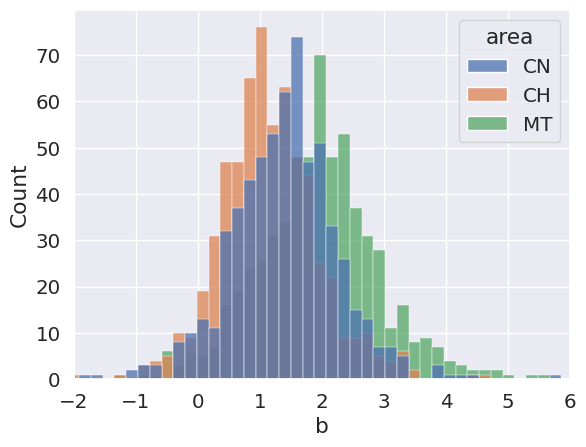

In [145]:
data = allitems.dropna(subset='b')
data = data.query('b < 60')
ax = sns.histplot(data,x='b',hue='area',multiple='layer',alpha=0.75)
ax.set_xlim(-2,6)

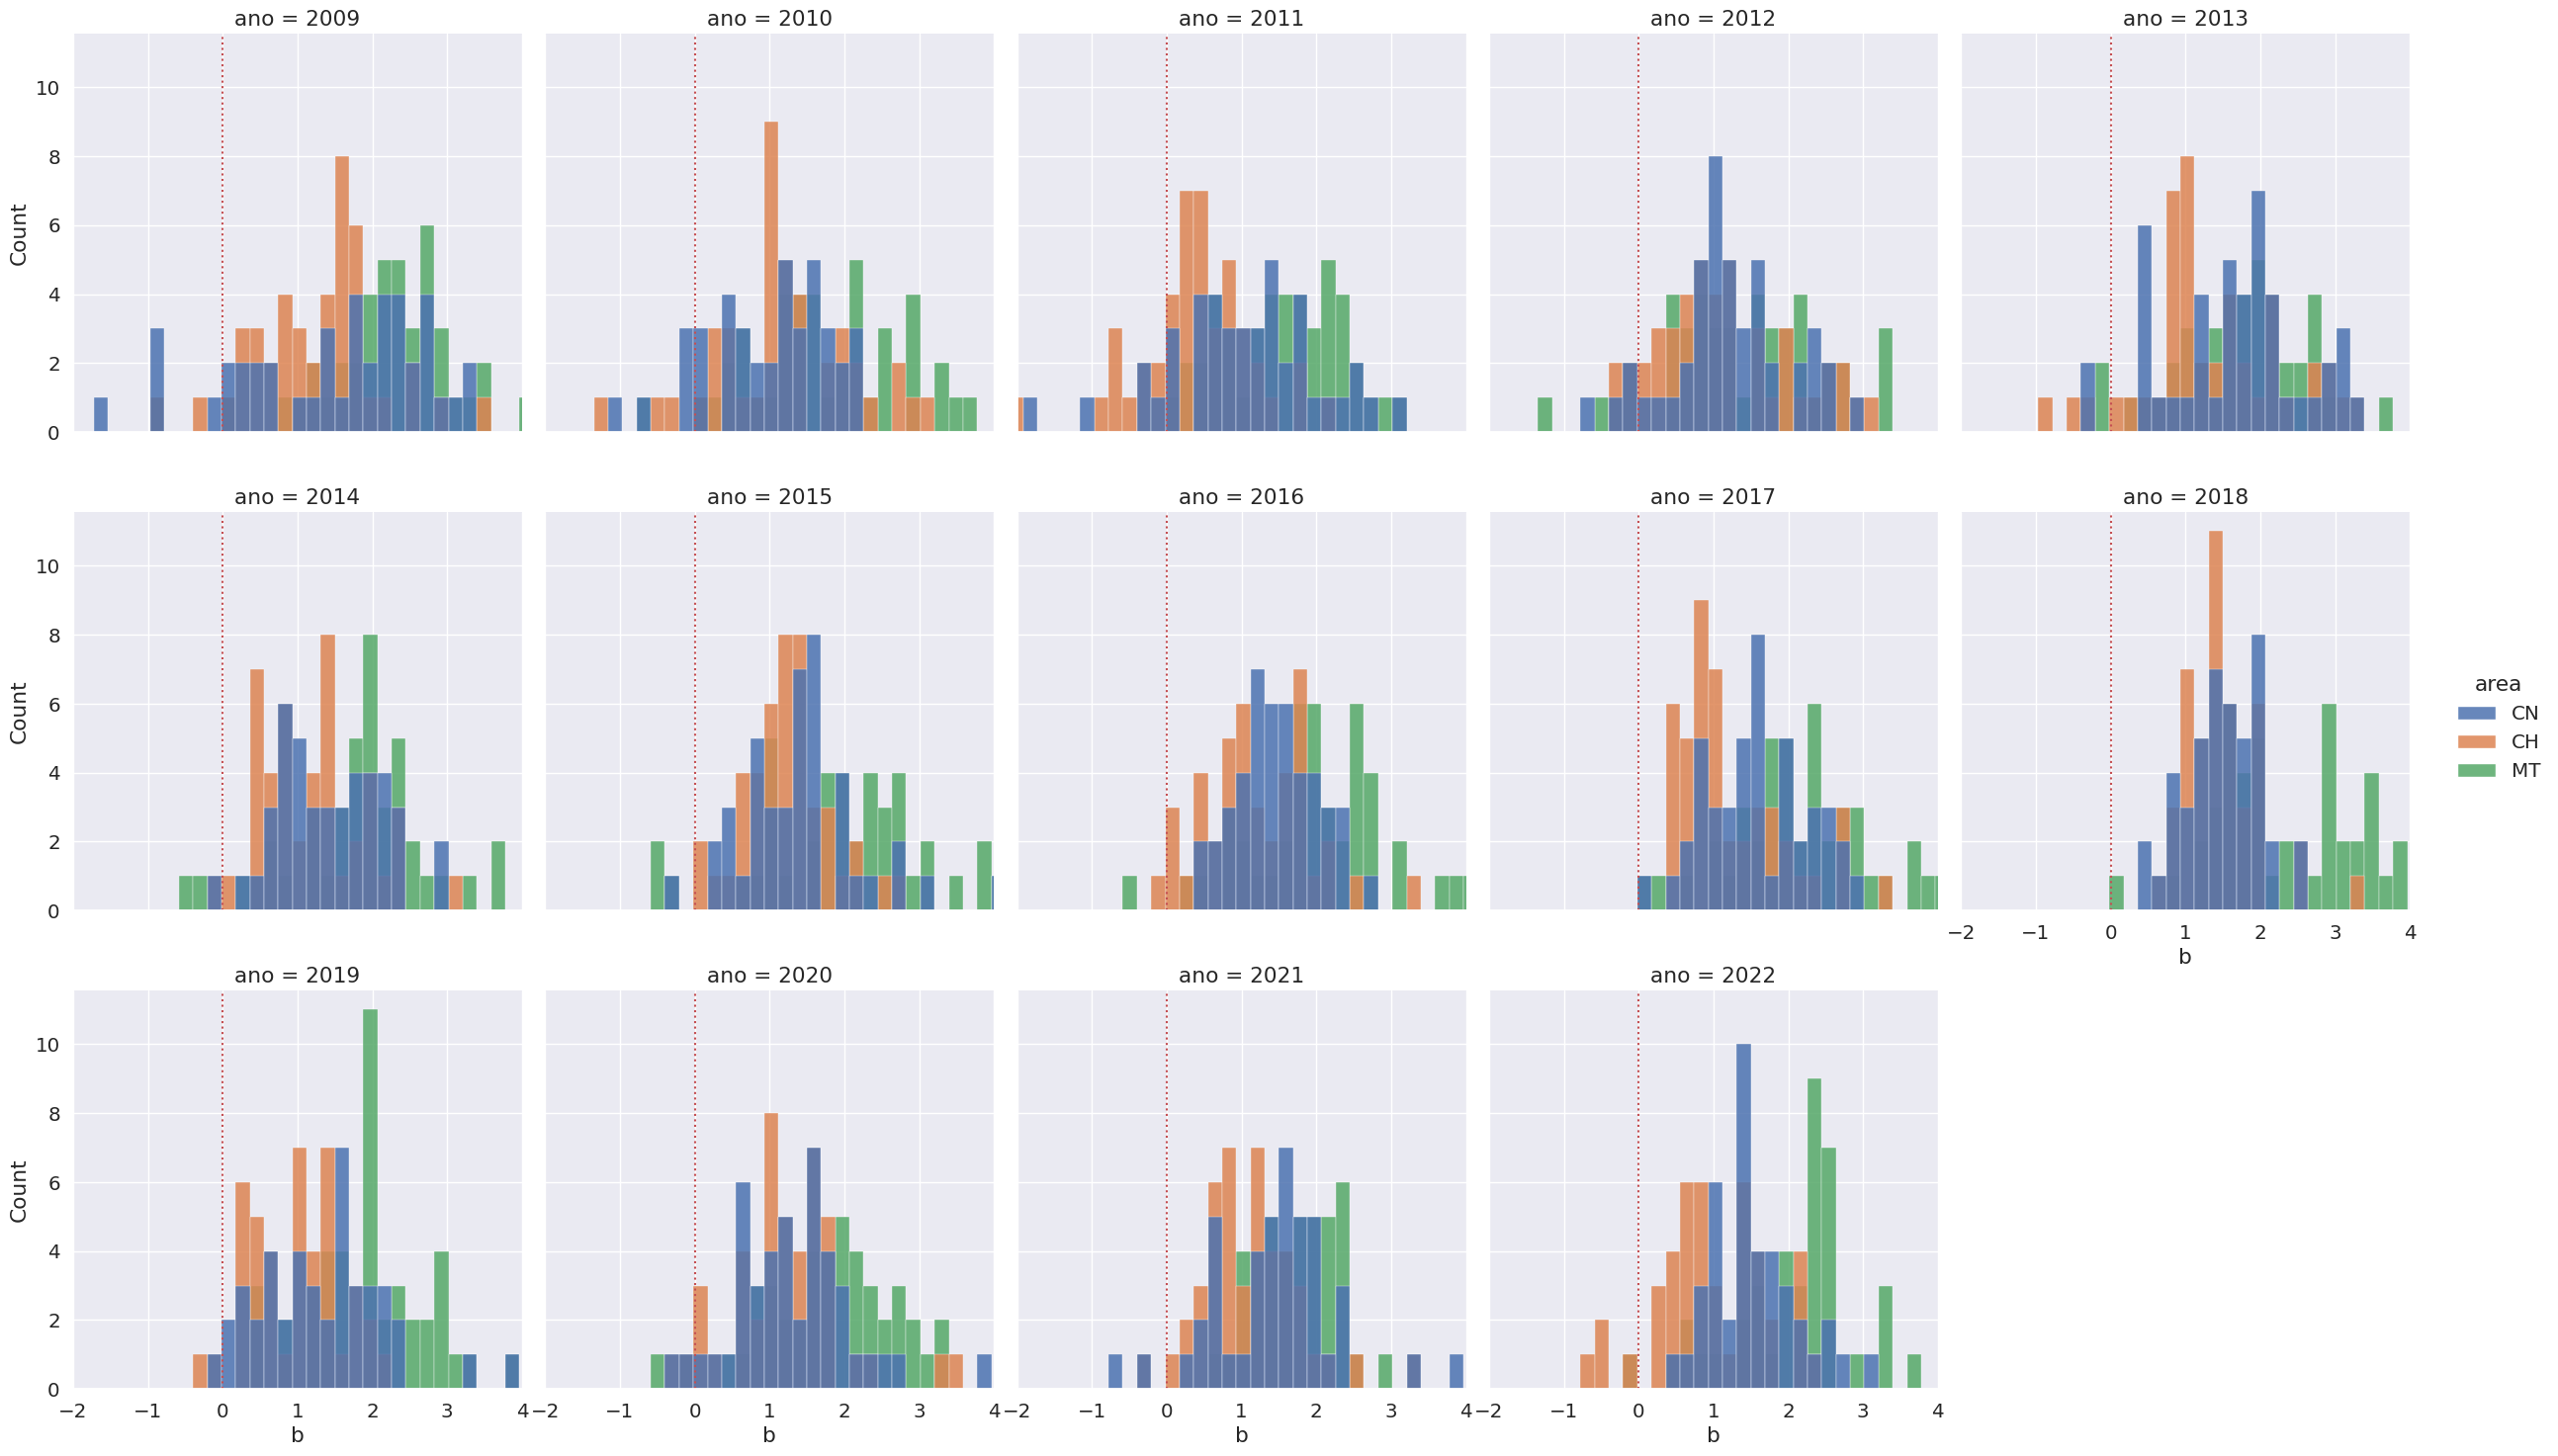

In [137]:
data = allitems.dropna(subset='b')
data = data.query('b < 60')
g = sns.displot(data,x='b',hue='area',col='ano',col_wrap=5,alpha=0.85)
g.set(xlim=(-2,4))
for ax in g.axes.flat:
    ax.axvline(x=0, color='r', linestyle=':')

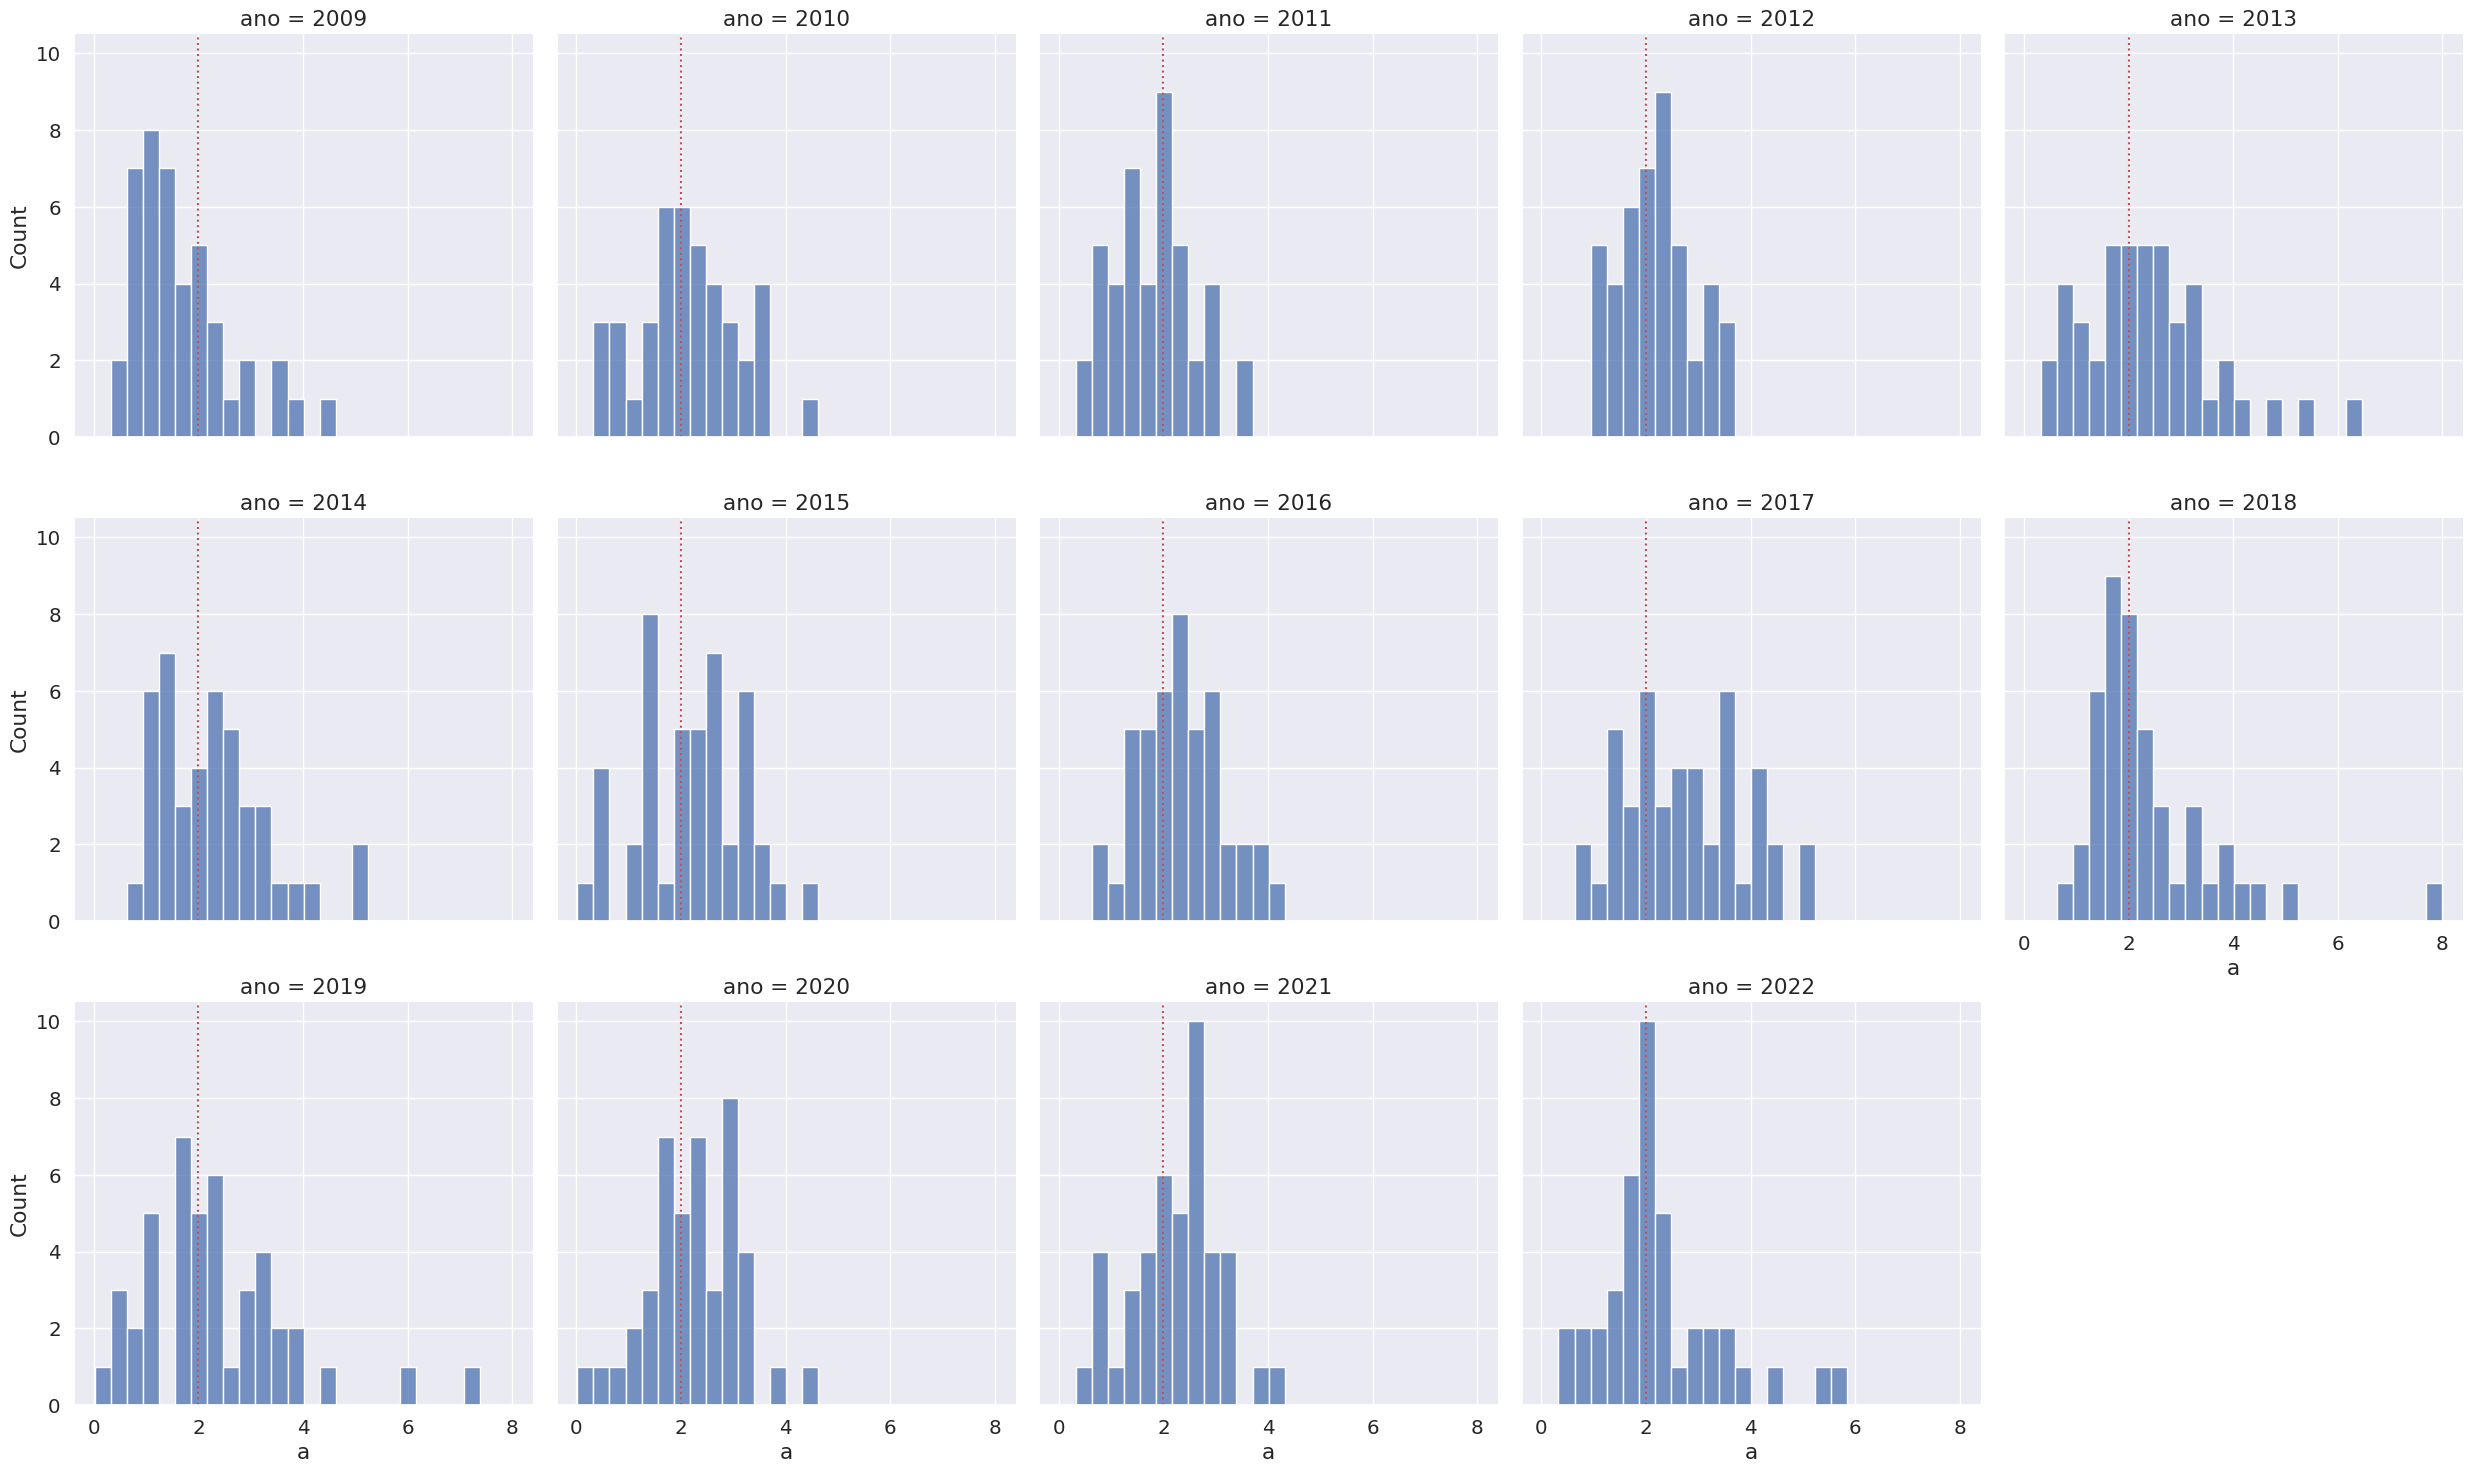

In [105]:
data = CN.dropna(subset='a')
g = sns.displot(data,x='a',col='ano',col_wrap=5)
#g.set(xlim=(-2,4))
for ax in g.axes.flat:
    ax.axvline(x=2, color='r', linestyle=':')